# **Project: Wrangling and Analyze Data**

## Table of Contents

* [Data Gathering](#data-gathering)
* [Data Assessment](#assessing-data)
* [Data Cleaning](#cleaning-data)
  * [Issue 1](#issue-1)
  * [Issue 2](#issue-2)
  * [Issue 3](#issue-3)
  * [Issue 4](#issue-4)
  * [Issue 5](#issue-5)
  * [Issue 6](#issue-6)
  * [Issue 7](#issue-7)
  * [Issue 8](#issue-8)
  * [Issue 9](#issue-9)
  * [Issue 10](#issue-10)
* [Storing The Data](#storing-data)
* [Analysis](#analysis)
* [Vizualization](#vizualization)
* [References](#references)

In [1]:
# Imported packages

import pandas as pd
import numpy as np

import requests
import tweepy
import json

import logging
import pprint
import os
import re

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timezone
from dotenv import load_dotenv


<a id='data-gathering'></a>

## Data Gathering

In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

### 1. Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)


In [2]:
df_tweets_enhanced = pd.read_csv("twitter-archive-enhanced.csv")
df_tweets_enhanced.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)


In [3]:
def image_pred_download():
    # folder = "img_pred_folder"
    # if not os.path.exists(folder):
    #     os.makedirs(folder)

    image_pred_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
    image_pred_response = requests.get(image_pred_url)

    with open("image-predictions.tsv", "wb") as file:
        file.write(image_pred_response.content)

    return pd.read_csv("image-predictions.tsv", sep='\t')


df_image_pred = image_pred_download()


In [4]:
df_image_pred.head(10)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### 3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)


In [5]:
# Importing authentication keys

load_dotenv()
my_key = os.getenv('API_KEY')
my_secret = os.getenv('API_KEY_SECRET')
access_token = os.getenv('ACCESS_TOKEN')
access_token_secret = os.getenv('ACCESS_TOKEN_SECRET')
my_token = os.getenv('MY_TOKEN')


In [6]:
# Setting up basic configuration for logging so as to log status and errors during API calls/requests

logging.basicConfig(level=logging.DEBUG, filename="log.log",
                    filemode="w", format="%(asctime)s - %(levelname)s - %(message)s")


In [7]:
# OAuth 1.0a Authorization

auth = tweepy.OAuth1UserHandler(
    my_key, my_secret, access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)


In [8]:
# OAuth 2.0 Authentication

client = tweepy.Client(bearer_token=my_token,
                       consumer_key=my_key,
                       consumer_secret=my_secret,
                       access_token=access_token,
                       access_token_secret=access_token_secret,
                       return_type=dict)


In [9]:
# Making a list of all the tweet ids from the given dataset

id_list = list(df_tweets_enhanced.tweet_id)


In [10]:
# Defining a function to get details tweets by id using OAuth 2.0.

def get_tweets_detailed(id_list):
    """
    I am getting these tweet fields because I plan using them
    for analysis in the future though for this current analysis,
    I will only be using the public metrics.
    """
    tweet_fields = [
        'id',
        'text',
        'created_at',
        'public_metrics',
        'source',
        'entities',
        'reply_settings',
    ]
    return client.get_tweets(id_list, tweet_fields=tweet_fields)


In [11]:
# Function to save tweets in a text file
def save_tweets_detailed():
    with open("tweet_detailed_json.txt", "w") as file:
        file.write(json.dumps(tweets_detailed))

# Frunction to read the tweets from the text file


def read_tweets_detailed():
    with open("tweet_detailed_json.txt") as file:
        json_obj = json.load(file)
    return json_obj


In [12]:
"""
Creating a function to get tweets in batches because of Twtter's rate limit.
Using the get_tweets method, up to 100 tweets can be gotten with a single HTTP
request. That means all 2400+ tweet data can be gotten at once (with no wait time) 
since we are making only 25 HTTP requests in total (instead of 2400+ requests)

Also, in order to prevent making unnecesary HTTP requests and prevent overwriting
vital data, I have made it so the function only executes if the .txt file does not exist
in the current directory.
"""


def get_tweet_in_batches(list_of_ids, batch_size=100):
    if not os.path.exists('tweet_detailed_json.txt'):
        index = 0
        id_queue = []
        tweets_detailed = []
        while len(id_queue) == batch_size or not id_queue:
            id_queue = list_of_ids[index:(index+batch_size)]
            """
            The get_tweets that was defined above will return a dict object because that 
            is the return type that was set in the client call. It returns a dictionary 
            with a single key "data" and a list of JSON objects as the value. Each object 
            in the list corresponds to a single tweet.
            """
            logging.debug(f"Getting tweets {index} to {index+batch_size}")
            tweets_detailed.extend(iter(get_tweets_detailed(id_queue)['data']))
            index += batch_size
        return tweets_detailed
    else:
        logging.warning("""
                    A tweet_detailed_json.txt file already exists in current directory. 
                    If you want to make new HTTP requests with this function, delete 
                    the 'tweet_detailed_json.txt' file from current directory
                    """)
        return read_tweets_detailed()


# Calling the function to get data for all tweets in the tweet list
tweets_detailed = get_tweet_in_batches(list_of_ids=id_list)


In [13]:
# Confirming the tweets' data was queried properly
pprint.pprint(tweets_detailed[0])


{'created_at': '2017-08-01T16:23:56.000Z',
 'entities': {'annotations': [{'end': 14,
                               'normalized_text': 'Phineas',
                               'probability': 0.6637,
                               'start': 8,
                               'type': 'Person'}],
              'urls': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
                        'end': 109,
                        'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
                        'media_key': '3_892420639486877696',
                        'start': 86,
                        'url': 'https://t.co/MgUWQ76dJU'}]},
 'id': '892420643555336193',
 'public_metrics': {'like_count': 33797,
                    'quote_count': 219,
                    'reply_count': 139,
                    'retweet_count': 6999},
 'reply_settings': 'everyone',
 'source': 'Twitter for iPhone',
 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole

In [14]:
# Confirming the number of tweets queried
len(tweets_detailed)


2327

In [15]:
# Saving the detailed tweet data to a text file
save_tweets_detailed()


In [16]:
# Reading the detailed tweet data from the text file
tweets_detailed = read_tweets_detailed()


In [17]:
# Functions to extract only the public metrics from the detailed tweet data and store in a text file

def get_tweets_data():
    tweet_data = []
    for data in tweets_detailed:
        data["public_metrics"]["tweet_id"] = data['id']
        data["public_metrics"]["created_at"] = data['created_at']
        tweet_data.append(data["public_metrics"])
    return tweet_data


def save_tweets_data():
    with open("tweet_json.txt", "w") as file:
        file.write(json.dumps(get_tweets_data()))


save_tweets_data()


In [18]:
# Reading the tweets' data to a pandas dataframe

df_public_metrics = pd.read_json("tweet_json.txt")
df_public_metrics


,retweet_count,reply_count,like_count,quote_count,tweet_id,created_at
0,6999,139,33797,219,892420643555336192,2017-08-01 16:23:56+00:00
1,5298,170,29314,274,892177421306343424,2017-08-01 00:17:27+00:00
2,3477,109,22044,145,891815181378084864,2017-07-31 00:18:03+00:00
3,7220,142,36917,286,891689557279858688,2017-07-30 15:58:51+00:00
4,7753,193,35297,296,891327558926688256,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...
2322,37,9,89,0,666049248165822464,2015-11-16 00:24:50+00:00
2323,115,1,247,2,666044226329800704,2015-11-16 00:04:52+00:00
2324,36,1,100,0,666033412701032448,2015-11-15 23:21:54+00:00
2325,39,0,112,0,666029285002620928,2015-11-15 23:05:30+00:00


In [19]:
# Saving the new twitter data to a csv
df_public_metrics.to_csv('tweets_public_metrics.csv', index=False)
logging.debug(
    "Successfully saved df_public_metrics to tweets_public_metrics.csv in current directory")
# if os.path.exists('tweets_public_metrics.csv'):
# else:
#     logging.warning("CSV file was not created")


In [20]:
# Function to get information for a list of tweet ids using OAuth 1.0a

def get_tweets_single(id_list):
    """
    This function makes a HTTP request for each tweet one by one
    """
    for tweet_id in id_list:
        try:
            logging.debug(
                'get_tweets_single: fetching tweet for ID %s', tweet_id)
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print(f"{tweet_id}, {tweet.text.encode('UTF-8')}")
            print(f"{tweet_id}, {tweet.favorite_count}")
            print(f"{tweet_id}, {tweet.retweet_count}")
            return tweet
        except tweepy.TweepyException as te:
            logging.warn(
                'get_tweets_single: failed to get tweet ID %s: %s', tweet_id, te.message)


<a id='assessing-data'></a>

## Assessing Data

In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


## A.


In [21]:
df_tweets_enhanced.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Observation(s)

- On #6, #7 and #8, we can see that 181 of the tweets are retweets (since they have a retweet status id)
- There are many missing values in the columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`


## B.


In [22]:
df_tweets_enhanced.dtypes


tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### Observtion(s)

- The column names ending with 'id' are in numeric format
- Timestamp columns are not in datetime format


## C.


In [23]:
df_tweets_enhanced[['name', 'doggo', 'floofer', 'pupper', 'puppo']]


,name,doggo,floofer,pupper,puppo
0,Phineas,None,None,None,None
1,Tilly,None,None,None,None
2,Archie,None,None,None,None
3,Darla,None,None,None,None
4,Franklin,None,None,None,None
...,...,...,...,...,...
2351,None,None,None,None,None
2352,a,None,None,None,None
2353,a,None,None,None,None
2354,a,None,None,None,None


In [24]:
df_tweets_enhanced[['name', 'doggo', 'floofer', 'pupper', 'puppo']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     2356 non-null   object
 1   doggo    2356 non-null   object
 2   floofer  2356 non-null   object
 3   pupper   2356 non-null   object
 4   puppo    2356 non-null   object
dtypes: object(5)
memory usage: 92.2+ KB


### Observation(s)

- None values are interpreted literally as string in dog stage columns


## D.


In [25]:
# Increasing the maximum column width so we can better see the contents of the text column
pd.set_option('max_colwidth', 800)


In [26]:
df_tweets_enhanced[df_tweets_enhanced.rating_denominator != 10][[
    'tweet_id', 'text', 'rating_numerator', 'rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


### Observation(s)

- Some tweets (i.e. 342, 516, 902) have numbers that are in the format of dog rating but are not really ratings.
- Some tweets (i.e. 1202, 1662) have more than one number ratio, but the last figure is usually the valid dog rating.


# E.


In [27]:
# df_tweets_enhanced[df_tweets_enhanced.text.str.contains(r"-?\d+\.\d+\/10|-?\d+\/10")]
# df_tweets_enhanced[df_tweets_enhanced.text.str.contains(r"-?\d+\.\d+\/10|-?\d+\/10")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]
# df_tweets_enhanced[df_tweets_enhanced.text.str.contains(
#     r"-?\d+\.\d+\/10|-?\d+\/10")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]


In [28]:
# df_tweets_enhanced['text'].apply(lambda x: len(re.findall("-?\d+\.\d+\/10|-?\d+\/10", x)) > 1)
# df_tweets_enhanced['text'].apply(lambda x: len(re.findall("-?\d+\.\d+\/10|-?\d+\/10", x)) > 1).value_counts()
df_tweets_enhanced[df_tweets_enhanced['text'].apply(lambda x: len(re.findall(
    "-?\d+\.\d+\/10|-?\d+\/10", x)) > 1)][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
561,802624713319034886,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10
766,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10
860,763167063695355904,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,8,10
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10,10
1222,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10,10
1359,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9,10
1459,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4,10
1465,694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10,10
1508,691483041324204033,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5,10


### Observation(s)

- The tweets above all have more than one valid rating because the image contained more than one dog.


# F.


In [29]:
df_tweets_enhanced[df_tweets_enhanced.text.str.contains(
    r"-\d+\.\d+\/10|-\d+\/10")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
2260,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant plagiarism. Curious grammar. -5/10 https://t.co/r7XzeQZWzb,5,10


### Observation(s)

- Some tweets (i.e. 2260) have negative numerator rating.


## G.


In [30]:
df_image_pred[['p1', 'p2', 'p3']]


,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
...,...,...,...
2070,basset,English_springer,German_short-haired_pointer
2071,paper_towel,Labrador_retriever,spatula
2072,Chihuahua,malamute,kelpie
2073,Chihuahua,Pekinese,papillon


### Observation(s)

- Dog prediction names are separated by underscores instead of spaces and they are not capitalized


## H.


In [31]:
df_tweets_enhanced[df_tweets_enhanced['name'].apply(
    lambda x: x.islower())][['tweet_id', 'name']]


,tweet_id,name
22,887517139158093824,such
56,881536004380872706,a
118,869988702071779329,quite
169,859196978902773760,quite
193,855459453768019968,quite
...,...,...
2349,666051853826850816,an
2350,666050758794694657,a
2352,666044226329800704,a
2353,666033412701032449,a


### Observation(s)

- Many of the names in the `names` column are not valid names for dogs.

---


### Quality issues

1. 181 of the tweets are retweets (since they have a retweet status id)
2. Large number of missing values in the following columns:
   - in_reply_to_status_id,
   - in_reply_to_user_id,
   - retweeted_status_id,
   - retweeted_status_user_id,
   - retweeted_status_timestamp
   -
3. id columns (column names ending with 'id') are in numeric datatype instead of string datatype. I will need them to be in string format because I will not be perfroming calculations with them.

4. Timestamp columns are string instead of datetime datatype

5. Empty values are interpreted as string "None" in dog stage columns

6. The dog ratings were not properly extracted for some tweets as they are different from the values in the tweet text

7. Dog prediction names are separated by underscores instead of spaces and they are not capitalized

8. Some of the names in the `names` column are not valid names for dogs.


### Tidiness issues

1. Dog stage variable is in multiple columns instead of 1
2. The 3 datasets are in 3 seperate tables instead of 1.


<a id='cleaning-data'></a>

## Cleaning Data

In this section, clean **all** of the issues you documented while assessing.

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).


In [32]:
# Make copies of original pieces of data

df_copy_image_pred = df_image_pred.copy()
df_copy_public_metrics = df_public_metrics.copy()
df_copy_tweets_enhanced = df_tweets_enhanced.copy()


<a id='issue-1'></a>

### Issue #1:


#### Define

- From the `tweets enhanced` table, remove rows that have `retweeted status id` since they are retweets and are not needed for this analysis.


#### Code


In [33]:
# Checking the shape before removing rows
df_copy_tweets_enhanced.shape


(2356, 17)

In [34]:
# Removing the rows
df_copy_tweets_enhanced = df_copy_tweets_enhanced[df_tweets_enhanced["retweeted_status_id"].isna(
)]


#### Test


In [35]:
# Checking the shape after removing the rows
df_copy_tweets_enhanced.shape


(2175, 17)

<a id='issue-2'></a>

### Issue #2:


#### Define

- Drop the retweet and reply columns, from the `tweets_enhanced` table, since they are not needed for this analysis


#### Code


In [36]:
# Checking the shape before dropping columns
df_copy_tweets_enhanced.shape


(2175, 17)

In [37]:
# Droping the columns
df_copy_tweets_enhanced.drop(columns=['retweeted_status_id',
                                      'retweeted_status_user_id',
                                      'retweeted_status_timestamp',
                                      'in_reply_to_status_id',
                                      'in_reply_to_user_id'],
                             inplace=True)


#### Test


In [38]:
# Checking the shape after removing the rows
df_copy_tweets_enhanced.shape


(2175, 12)

<a id='issue-3'></a>

### Issue #3:


#### Define

Change `tweet_id` column to string datatype in the 3 tables, since they will not be used for any arithmetic operation


#### Code


In [39]:
# Checking the tweet_id datatypes
df_copy_tweets_enhanced.tweet_id.dtypes, df_copy_public_metrics.tweet_id.dtypes, df_copy_image_pred.tweet_id.dtypes


(dtype('int64'), dtype('int64'), dtype('int64'))

In [40]:
# Changing the datatypes
df_copy_image_pred = df_copy_image_pred.astype({'tweet_id': 'str'})
df_copy_public_metrics = df_copy_public_metrics.astype({'tweet_id': 'str'})
df_copy_tweets_enhanced = df_copy_tweets_enhanced.astype({'tweet_id': 'str'})


#### Test


In [41]:
df_copy_tweets_enhanced.tweet_id.dtypes, df_copy_public_metrics.tweet_id.dtypes, df_copy_image_pred.tweet_id.dtypes


(dtype('O'), dtype('O'), dtype('O'))

<a id='issue-4'></a>

### Issue #4:


#### Define

Change `timestamp` column to datetime datatype


#### Code


In [42]:
# Checking current datatype for timestamp column
df_copy_tweets_enhanced.timestamp.dtypes


dtype('O')

In [43]:
# Changing the timestamp column datatype to datetime
df_copy_tweets_enhanced['timestamp'] = pd.to_datetime(
    df_copy_tweets_enhanced['timestamp'])


#### Test


In [44]:
df_copy_tweets_enhanced.timestamp.dtypes


datetime64[ns, UTC]

<a id='issue-5'></a>

### Issue #5:


#### Define

Replace 'None' string with None datatype in the dog stage columns


#### Code


In [45]:
# Confirming that the last 4 columns are showing 2175 values each
df_copy_tweets_enhanced[['doggo', 'floofer', 'pupper', 'puppo']].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   doggo    2175 non-null   object
 1   floofer  2175 non-null   object
 2   pupper   2175 non-null   object
 3   puppo    2175 non-null   object
dtypes: object(4)
memory usage: 85.0+ KB


In [46]:
def replace_none_values():
    for column in df_copy_tweets_enhanced.columns:
        df_copy_tweets_enhanced[column].replace('None', None, inplace=True)


replace_none_values()


#### Test


In [47]:
# Confirming that None strings have been properly converted to NaNs
df_copy_tweets_enhanced[['doggo', 'floofer', 'pupper', 'puppo']].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   doggo    87 non-null     object
 1   floofer  10 non-null     object
 2   pupper   234 non-null    object
 3   puppo    25 non-null     object
dtypes: object(4)
memory usage: 85.0+ KB


<a id='issue-6'></a>

### Issue #6:


#### Define

- Extract the dog rating numerator again from the tweet text, taking decimal numbers (e.g. 13.5/10) and negative ratings (e.g. -5/10) into account.
- Change `rating_numerator` column to float datatype and `rating_denominator` column to integer datatype
- Remove rows where rating_demoninator is not equal to 10 because there was no dog rating in the tweets so those numbers not valid


#### Code


In [48]:
"""
The function below is created to extract ratings, both decimal
and non decimal. It only extracts ratings with denominator of 10
and it also extracts negative ratings. Some of the tweets in the
dataset have more than one dog rating so I just took the last
rating.
"""


def get_rating(text):
    try:
        return re.findall("-?\d+\.\d+\/10|-?\d+\/10", text)[-1]
    except IndexError:
        return np.nan


In [49]:
# Function to split the rating numbers to fill the numerator and denominator columns
def split_rating(rating, index):
    try:
        return rating.split("/")[index]
    except AttributeError:
        return 0


In [50]:
# Extracting the ratings agin with the new regular expression and storing in a new column
df_copy_tweets_enhanced['rating'] = df_copy_tweets_enhanced['text'].apply(
    lambda x: get_rating(x))

# Confirming changes
df_copy_tweets_enhanced[['text', 'rating_numerator',
                         'rating_denominator', 'rating']]


,text,rating_numerator,rating_denominator,rating
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,13/10
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,13/10
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,12/10
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,13/10
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,12/10
...,...,...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,5/10
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,6/10
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,9/10
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,7/10


In [51]:
# Extracting the numerators and denominators again
df_copy_tweets_enhanced['rating_numerator'] = df_copy_tweets_enhanced['rating'].apply(
    lambda x: split_rating(x, 0))
df_copy_tweets_enhanced['rating_denominator'] = df_copy_tweets_enhanced['rating'].apply(
    lambda x: split_rating(x, 1))

# Confirming changes
df_copy_tweets_enhanced[['text', 'rating_numerator',
                         'rating_denominator', 'rating']]


,text,rating_numerator,rating_denominator,rating
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,13/10
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,13/10
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,12/10
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,13/10
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,12/10
...,...,...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,5/10
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,6/10
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,9/10
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,7/10


In [52]:
# Confirming current datatype for rating_numerator and rating_denominator columns
df_copy_tweets_enhanced.rating_numerator.dtypes, df_copy_tweets_enhanced.rating_denominator.dtypes


(dtype('O'), dtype('O'))

In [53]:
# Changing the datatype to float and int respectively
df_copy_tweets_enhanced = df_copy_tweets_enhanced.astype(
    {'rating_numerator': 'float64'})
df_copy_tweets_enhanced = df_copy_tweets_enhanced.astype(
    {'rating_denominator': 'int64'})

# Confirming changes
df_copy_tweets_enhanced.rating_numerator.dtypes, df_copy_tweets_enhanced.rating_denominator.dtypes


(dtype('float64'), dtype('int64'))

In [54]:
# Checking for rows with denominator not equal to 10, i.e tweets that have no rating
df_copy_tweets_enhanced[df_copy_tweets_enhanced['rating_denominator'] != 10].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 342 to 1843
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            16 non-null     object             
 1   timestamp           16 non-null     datetime64[ns, UTC]
 2   source              16 non-null     object             
 3   text                16 non-null     object             
 4   expanded_urls       13 non-null     object             
 5   rating_numerator    16 non-null     float64            
 6   rating_denominator  16 non-null     int64              
 7   name                3 non-null      object             
 8   doggo               0 non-null      object             
 9   floofer             0 non-null      object             
 10  pupper              0 non-null      object             
 11  puppo               0 non-null      object             
 12  rating              0 non-null    

In [55]:
# Confirming the number of rows before dropping the rows
df_copy_tweets_enhanced.shape


(2175, 13)

In [56]:
# Removing tweets that have no rating by replacing the dataframe with filtered dataframe
df_copy_tweets_enhanced = df_copy_tweets_enhanced[df_copy_tweets_enhanced['rating_denominator'] == 10]


#### Test


In [57]:
# Confirming that the number of rows has reduced
df_copy_tweets_enhanced.shape


(2159, 13)

In [58]:
# Confirming that there are no rows with ratings other than 10
df_copy_tweets_enhanced[df_copy_tweets_enhanced.rating_denominator != 10][[
    'tweet_id', 'text', 'rating_numerator', 'rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator


In [59]:
# Confirming that the last rating is the one that was extracted
df_copy_tweets_enhanced[df_copy_tweets_enhanced['text'].apply(lambda x: len(re.findall(
    "-?\d+\.\d+\/10|-?\d+\/10", x)) > 1)][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,13.0,10
766,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",11.0,10
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,7.0,10
1222,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,8.0,10
1359,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,2.0,10
1459,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",13.0,10
1465,694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,5.0,10
1508,691483041324204033,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,10.0,10
1525,690400367696297985,This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf,6.0,10
1538,689835978131935233,Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10 https://t.co/MuqHPvtL8c,10.0,10


In [60]:
# df_tweets_enhanced['text'].apply(lambda x: len(re.findall("-?\d+\.\d+\/10|-?\d+\/10", x)) > 1)
# df_tweets_enhanced['text'].apply(lambda x: len(re.findall("-?\d+\.\d+\/10|-?\d+\/10", x)) > 1).value_counts()


In [61]:
# Setting column width to be smaller
pd.set_option('max_colwidth', 400)


<a id='issue-7'></a>

### Issue #7:


#### Define

Remove the underscores in the dog breed names and capitalize them


#### Code


In [62]:
df_copy_image_pred.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [63]:
def reformat_dog_breed_names():
    columns = ['p1', 'p2', 'p3']  # List of columns to be worked on
    for column in columns:
        df_copy_image_pred[column] = df_copy_image_pred[column].apply(
            lambda x: " ".join(x.split('_')).title())
        df_copy_image_pred[column] = df_copy_image_pred[column].apply(
            lambda x: " ".join(x.split('_')).title())


reformat_dog_breed_names()


#### Test


In [64]:
df_copy_image_pred.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='issue-8'></a>

### Issue #8:


#### Define

Replace invalid dog names with None by removing all names that are lower case.


#### Code


In [65]:
# Invalid dog names are in lower case
df_copy_tweets_enhanced[['text', 'name']].tail()


,text,name
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,None
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,a
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,a
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,a
2355,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,None


In [66]:
# Function to remove names that are lower case
def remove_invalid_names(value):
    try:
        return None if value[0].islower() else value
    except Exception:
        return value


def check_invalid_names(value):
    try:
        return bool(value[0].islower())
    except Exception:
        return False


In [67]:
# Replacing invalid dog names with None
df_copy_tweets_enhanced['name'] = df_copy_tweets_enhanced['name'].apply(lambda x: remove_invalid_names(x))


#### Test


In [68]:
df_copy_tweets_enhanced[['text', 'name']].tail()


,text,name
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,None
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,None
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,None
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,None
2355,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,None


In [69]:
# Confirming there are no invalid names
df_copy_tweets_enhanced[df_copy_tweets_enhanced['name'].apply(lambda x: check_invalid_names(x))]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating


<a id='issue-9'></a>

### Issue #9:


#### Define

Merge the dog stage columns to one column.


#### Code


In [70]:
df_copy_tweets_enhanced[['name', 'doggo',
                         'floofer', 'pupper', 'puppo']].head(16)


,name,doggo,floofer,pupper,puppo
0,Phineas,None,None,None,None
1,Tilly,None,None,None,None
2,Archie,None,None,None,None
3,Darla,None,None,None,None
4,Franklin,None,None,None,None
5,None,None,None,None,None
6,Jax,None,None,None,None
7,None,None,None,None,None
8,Zoey,None,None,None,None
9,Cassie,doggo,None,None,None


In [71]:
# Changing all values in dog_stage column to NaN values
df_copy_tweets_enhanced['dog_stage'] = np.nan

# Indiviually applying the dog stage based on which dog stage column is populated
df_copy_tweets_enhanced['dog_stage'] = np.where(
    df_copy_tweets_enhanced['doggo'] == 'doggo', df_copy_tweets_enhanced['doggo'], df_copy_tweets_enhanced['dog_stage'])
df_copy_tweets_enhanced['dog_stage'] = np.where(
    df_copy_tweets_enhanced['floofer'] == 'floofer', df_copy_tweets_enhanced['floofer'], df_copy_tweets_enhanced['dog_stage'])
df_copy_tweets_enhanced['dog_stage'] = np.where(
    df_copy_tweets_enhanced['pupper'] == 'pupper', df_copy_tweets_enhanced['pupper'], df_copy_tweets_enhanced['dog_stage'])
df_copy_tweets_enhanced['dog_stage'] = np.where(
    df_copy_tweets_enhanced['puppo'] == 'puppo', df_copy_tweets_enhanced['puppo'], df_copy_tweets_enhanced['dog_stage'])


In [72]:
# Dropping unnecessary columns
df_copy_tweets_enhanced.drop(
    columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)


#### Test


In [73]:
# Checking 'doggo' dog stage
df_copy_tweets_enhanced[df_copy_tweets_enhanced['dog_stage'] == 'doggo'].head()


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10,Cassie,14/10,doggo
43,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12.0,10,Yogi,12/10,doggo
99,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12.0,10,None,12/10,doggo
108,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12.0,10,Napolean,12/10,doggo
110,871102520638267392,2017-06-03 20:33:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758080503809,14.0,10,None,14/10,doggo


In [74]:
# Checking 'puppo' dog stage
df_copy_tweets_enhanced[df_copy_tweets_enhanced['dog_stage'] == 'puppo'].head()


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
12,889665388333682689,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13.0,10,None,13/10,puppo
14,889531135344209921,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13.0,10,Stuart,13/10,puppo
71,878776093423087618,2017-06-25 00:45:22+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,"https://twitter.com/dog_rates/status/878776093423087618/photo/1,https://twitter.com/dog_rates/status/878776093423087618/photo/1",13.0,10,Snoopy,13/10,puppo
94,874012996292530176,2017-06-11 21:18:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Sebastian. He can't see all the colors of the rainbow, but he can see that this flag makes his human happy. 13/10 #PrideMonth puppo https://t.co/XBE0evJZ6V","https://twitter.com/dog_rates/status/874012996292530176/photo/1,https://twitter.com/dog_rates/status/874012996292530176/photo/1",13.0,10,Sebastian,13/10,puppo
129,867421006826221569,2017-05-24 16:44:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Shikha. She just watched you drop a skittle on the ground and still eat it. Could not be less impressed. 12/10 superior puppo https://t.co/XZlZKd73go,https://twitter.com/dog_rates/status/867421006826221569/photo/1,12.0,10,Shikha,12/10,puppo


<a id='issue-10'></a>

### Issue #10:


#### Define

Join the 3 tables to one master table


#### Code


In [75]:
def merge_tables():
    table = pd.merge(df_copy_image_pred, df_copy_tweets_enhanced,
                     how='inner', on='tweet_id')
    return pd.merge(table, df_copy_public_metrics, how='inner', on='tweet_id')


df_master = merge_tables()


#### Test


In [76]:
df_master.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 1286
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1287 non-null   object             
 1   jpg_url             1287 non-null   object             
 2   img_num             1287 non-null   int64              
 3   p1                  1287 non-null   object             
 4   p1_conf             1287 non-null   float64            
 5   p1_dog              1287 non-null   bool               
 6   p2                  1287 non-null   object             
 7   p2_conf             1287 non-null   float64            
 8   p2_dog              1287 non-null   bool               
 9   p3                  1287 non-null   object             
 10  p3_conf             1287 non-null   float64            
 11  p3_dog              1287 non-null   bool               
 12  timestamp           1287 non-null 

<a id='storing-data'></a>

## Storing Data

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".


In [77]:
df_master.to_csv('twitter_archive_master.csv', index=False)
df_copy_image_pred.to_csv('cleaned_image_pred.csv', index=False)
df_copy_public_metrics.to_csv('cleaned_public_metrics.csv', index=False)
df_copy_tweets_enhanced.to_csv('cleaned_tweets_enhanced.csv', index=False)


<a id='analysis'></a>

## Analyzing and Visualizing Data

In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**


#### I have 3 questions I would like to analyze with this data.

1. Based on the algorithms first prediction for each image, what percent were correct (actual dog breeds) and what percentage were wrong?


In [78]:
df_master.head()
algo_pred = df_master.groupby(['p1_dog'])['p1_dog'].count()
algo_pred


p1_dog
False    339
True     948
Name: p1_dog, dtype: int64

2. So far, what is the fastest retweeted tweet from the time it was posted?
   - In order to analize this, we have to find the ratio between the number of retweets and the age (in days) of the tweet.
   - To get the age of the tweet, I will add a calculated column for age
   - To get the retweet ratio, I will add a calculted column as well


In [79]:

def add_days_column():
    today = datetime.now(timezone.utc)
    df_master['days'] = df_master['created_at'].apply(
        lambda x: (today - x) / np.timedelta64(1, 'D')).astype('int')


def add_ratio_column():
    df_master['retweet_ratio'] = df_master['retweet_count'] / df_master['days']


add_days_column()
add_ratio_column()

top_tweets = df_master.sort_values(
    by='retweet_ratio', ascending=False).head(10)
top_tweets[['tweet_id', 'text', 'name', 'retweet_count',
            'like_count', 'created_at', 'days', 'retweet_ratio']]
top_tweets


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,name,rating,dog_stage,retweet_count,reply_count,like_count,quote_count,created_at,days,retweet_ratio
1056,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,Toy Terrier,...,Stephan,13/10,NaN,51627,908,111599,2975,2016-12-09 06:17:20+00:00,2084,24.773033
1097,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,Standard Poodle,0.351308,True,Toy Poodle,0.271929,True,Tibetan Terrier,...,Bo,14/10,doggo,34528,237,82668,1030,2017-01-11 02:15:36+00:00,2051,16.834715
1201,859196978902773760,https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg,1,Angora,0.224218,False,Malamute,0.216163,True,Persian Cat,...,None,12/10,NaN,26270,520,80551,1307,2017-05-02 00:04:57+00:00,1941,13.534261
903,761672994376806400,https://pbs.twimg.com/ext_tw_video_thumb/761672828462718981/pu/img/R00UYAAWB3GtuHdI.jpg,1,Gondola,0.318851,False,Sea Lion,0.306525,False,Pool Table,...,None,10/10,NaN,26738,562,46282,2895,2016-08-05 21:19:27+00:00,2210,12.098643
1225,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,Golden Retriever,0.841001,True,Great Pyrenees,0.099278,True,Labrador Retriever,...,Zoey,13/10,NaN,22731,750,73921,1018,2017-06-01 20:18:38+00:00,1910,11.901047
394,678399652199309312,https://pbs.twimg.com/ext_tw_video_thumb/678399528077250560/pu/img/BOjUNHRsYLeSo0hl.jpg,1,Swing,0.929196,False,Bedlington Terrier,0.015047,True,Great Pyrenees,...,None,12/10,NaN,28565,547,73483,1321,2015-12-20 02:20:55+00:00,2439,11.711767
360,676219687039057920,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,1,Bubble,0.997556,False,Leafhopper,0.000159,False,Whippet,...,Kenneth,10/10,NaN,27764,359,70926,517,2015-12-14 01:58:31+00:00,2445,11.355419
1023,795464331001561088,https://pbs.twimg.com/ext_tw_video_thumb/795464066940764160/pu/img/jPkMMQXdydb7CqFX.jpg,1,Golden Retriever,0.193082,True,Chesapeake Bay Retriever,0.157927,True,Soft-Coated Wheaten Terrier,...,None,13/10,doggo,21962,349,46788,1152,2016-11-07 03:14:10+00:00,2116,10.379017
1208,862096992088072192,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,2,Chow,0.677589,True,Pomeranian,0.270648,True,Pekinese,...,None,13/10,NaN,19995,200,66281,641,2017-05-10 00:08:34+00:00,1933,10.344025
1282,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,...,None,13/10,NaN,15746,159,56831,377,2017-07-28 00:22:40+00:00,1854,8.492988


3. What is the relationship between retweets and likes?
   - I will be creating a seperate dataframe for this


In [80]:
retweets_v_likes = df_master[['tweet_id', 'retweet_count', 'like_count']]
retweets_v_likes


,tweet_id,retweet_count,like_count
0,666029285002620928,39,112
1,666044226329800704,115,247
2,666051853826850816,702,1027
3,666057090499244032,112,248
4,666058600524156928,47,99
...,...,...,...
1282,890729181411237888,15746,56831
1283,891087950875897856,2599,17802
1284,891327558926688256,7753,35297
1285,891689557279858688,7220,36917


### Insights:

1. From the #1 image predictions we have in our master dataset, we can see that 74% of the time, the predictions were actual dogs.

2. We can see here that the most viral tweet (measured by retweet count) is for a dog named Stephan given a rating of 13/10. The tweet was posted in December 2016 and has since gained over 111k likes and over 51k retweets.

3. From the scatterplot below (in the next section), we can see that there is a positive correlation between a tweets like count and retweet count.


<a id='viz'></a>

## Visualization


In [81]:
# chart text and figure size
sns.set(rc={"figure.figsize": (15, 8)}, font_scale=2)



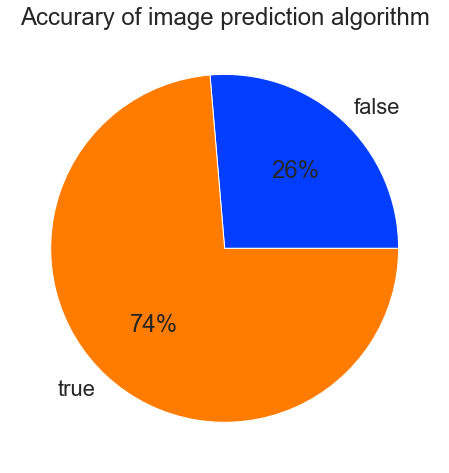

In [82]:
def plot_pie_chart():
    colors = sns.color_palette('bright')
    plt.title('Accurary of image prediction algorithm')
    labels = ['false', 'true']
    plt.pie(algo_pred, labels=labels,
            colors=colors, autopct='%.0f%%')


plot_pie_chart()


In [83]:
# def plot_vertical_bar():
#     sns.barplot('retweet_ratio', 'name', data=top_tweets)
#     sns.set_style("whitegrid")

#     plt.title('Most viral tweets')
#     plt.xlabel('Growth rate')
#     plt.ylabel('Tweet')

# plot_vertical_bar()


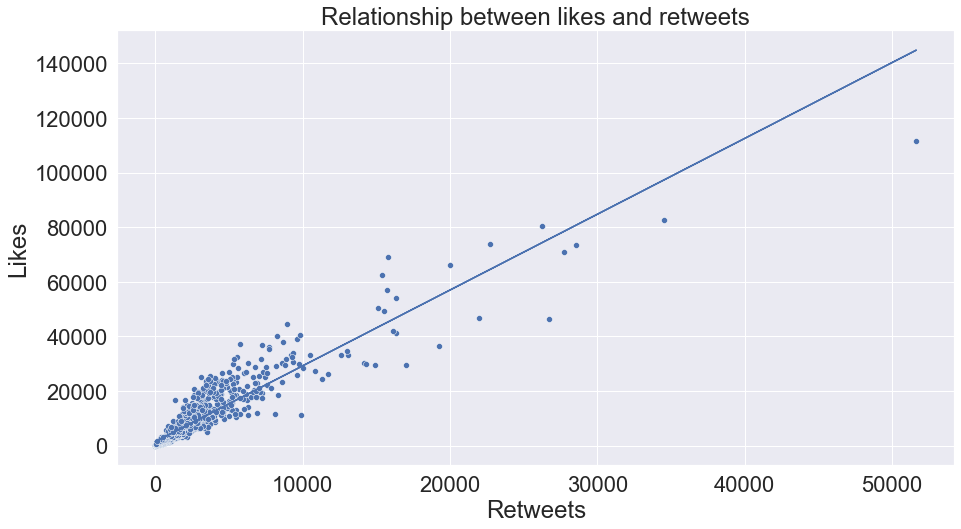

In [84]:
def plot_scatterplot():
    x_plot = np.array(retweets_v_likes['retweet_count'])
    y_plot = np.array(retweets_v_likes['like_count'])

    sns.scatterplot(x=x_plot, y=y_plot)

    sns.set(rc={"figure.figsize": (15, 15)}, font_scale=2)

    w = np.polyfit(x_plot, y_plot, 1)
    x = np.poly1d(w)

    # adding trendline to plot
    plt.plot(x_plot, x(x_plot))

    plt.title('Relationship between likes and retweets')
    plt.xlabel('Retweets')
    plt.ylabel('Likes')


plot_scatterplot()


<a id='references'></a>

# References

### Some of the very helpful URLs during my research are listed below

- https://stackoverflow.com/questions/23743460/replace-none-with-nan-in-pandas-dataframe#:~:text=You%20can%20use%20DataFrame.,not%20the%20string%20'None'%20.
- https://www.geeksforgeeks.org/python-program-split-join-string/#:~:text=the%20split()%20method%20in,joined%20by%20the%20str%20separator.
- https://towardsdatascience.com/fix-valueerror-truth-value-of-a-series-is-ambiguous-pandas-a683f0fd1b2f
- https://www.learndatasci.com/solutions/python-valueerror-truth-value-series-ambiguous-use-empty-bool-item-any-or-all/
- https://medium.com/analytics-vidhya/dealing-with-missing-values-nan-and-none-in-python-6fc9b8fb4f31#:~:text=As%20summary%2C%20NaN%20and%20None,To%20detect%20missing%20values%2C%20df.
- https://www.geeksforgeeks.org/get-utc-timestamp-in-python/
- https://stackoverflow.com/questions/61642034/displaying-full-content-of-dataframe-cell-without-ellipsis-truncating-the-text
